# Zuber - Ride Sharing Company

# Table of contents   <a id='back'></a>
1.[Introduction](#intro)  
2.[Steps](#steps)  
2.[Data Preprocessing](#data_prep)    
3.[Top 10 neighborhood- dropoff](#dropoff)  
4.[Graphs](#graphs)  
5.[Test Hypothesis](#hypothesis)  
6.[Conclusion](#end)  

<a id='intro'></a>

# Introduction

***Zuber, a new ride-sharing company is launching in Chicago. Our task is to find patterns in the available information  and understand passenger preferences and the impact of external factors on rides.
After working with a database, we will analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.***

<a id='steps'></a>

# Steps:  
***1.Analyze taxi companies and number of rides in the given time period.  
2.Identify the top 10 neighborhoods in terms of drop-offs.  
3.Draw conclusions based on the analysis.  
4.Test the hypothesis:  
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."***

***Importing all the necessary packages***

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns


In [30]:
# contains taxi company name and number of rides for each taxi company on November 15-16, 2017
taxi_trip = pd.read_csv('taxi_trip.csv')

***Viewing the dataset***

In [31]:
taxi_trip.head(10)

,Unnamed: 0,company_name,trips_amount
0,0,Flash Cab,19558
1,1,Taxi Affiliation Services,11422
2,2,Medallion Leasing,10367
3,3,Yellow Cab,9888
4,4,Taxi Affiliation Service Yellow,9299
5,5,Chicago Carriage Cab Corp,9181
6,6,City Service,8448
7,7,Sun Taxi,7701
8,8,Star North Management LLC,7455
9,9,Blue Ribbon Taxi Association Inc.,5953


[Back to Contents](#back)

<a id='data_prep'></a>

# Data Preprocessing

***Checking for inappropriate values and missing values in 'taxi_trip'***

In [32]:
taxi_trip['trips_amount'].unique()

array([19558, 11422, 10367,  9888,  9299,  9181,  8448,  7701,  7455,
        5953,  5015,  4383,  3355,  3175,  2235,  2216,  2070,  1955,
        1775,  1607,  1486,  1404,  1296,  1259,  1014,   978,   428,
         402,   310,   250,   230,   210,   147,   146,   127,    39,
          37,    36,    33,    31,    29,    27,    25,    21,    20,
          16,    15,    14,    13,    12,    11,     8,     7,     5,
           3,     2], dtype=int64)

In [33]:
taxi_trip['company_name'].value_counts().tail(10)

American United                1
Chicago Independents           1
KOAM Taxi Association          1
Chicago Taxicab                1
Top Cab Affiliation            1
Gold Coast Taxi                1
Service Taxi Association       1
5 Star Taxi                    1
303 Taxi                       1
3556 - 36214 RC Andrews Cab    1
Name: company_name, dtype: int64

In [34]:
taxi_trip['company_name'].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

***Getting the information of the taxi_trip dataset***

In [35]:
taxi_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    64 non-null     int64 
 1   company_name  64 non-null     object
 2   trips_amount  64 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


***From the above information and our analysis of the columns , we see that there is no missing values and all   
the data types are appropriate to the corresponding fields.No possible pattern were detected.***

In [36]:
#contains the average number of rides that ended in each neighborhood in November 2017 and chicago neighborhood 
#where rides ended.
dropoff_trip = pd.read_csv('dropoff_trip.csv')

***Viewing the dropoff_trip dataset***

In [37]:
dropoff_trip.head(10)

,Unnamed: 0,dropoff_location_name,average_trips
0,0,Loop,10727.466667
1,1,River North,9523.666667
2,2,Streeterville,6664.666667
3,3,West Loop,5163.666667
4,4,O'Hare,2546.900000
5,5,Lake View,2420.966667
6,6,Grant Park,2068.533333
7,7,Museum Campus,1510.000000
8,8,Gold Coast,1364.233333
9,9,Sheffield & DePaul,1259.766667


***Checking for inappropriate values and missing values in 'dropoff_trip'***

In [38]:
dropoff_trip['dropoff_location_name'].unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

In [39]:
dropoff_trip['average_trips'].unique()

array([1.07274667e+04, 9.52366667e+03, 6.66466667e+03, 5.16366667e+03,
       2.54690000e+03, 2.42096667e+03, 2.06853333e+03, 1.51000000e+03,
       1.36423333e+03, 1.25976667e+03, 1.24653333e+03, 1.21206667e+03,
       8.63700000e+02, 8.49666667e+02, 8.39833333e+02, 7.45400000e+02,
       6.20333333e+02, 5.83300000e+02, 5.16400000e+02, 4.69566667e+02,
       3.95533333e+02, 3.93266667e+02, 3.56733333e+02, 2.99033333e+02,
       2.98333333e+02, 2.96566667e+02, 2.55133333e+02, 2.08233333e+02,
       1.82600000e+02, 1.80900000e+02, 1.78900000e+02, 1.43300000e+02,
       1.42900000e+02, 1.19733333e+02, 9.78666667e+01, 9.52333333e+01,
       8.93666667e+01, 7.71000000e+01, 7.70333333e+01, 7.43333333e+01,
       7.43000000e+01, 6.78333333e+01, 6.57666667e+01, 6.40333333e+01,
       5.90333333e+01, 5.39666667e+01, 5.24333333e+01, 5.16000000e+01,
       4.44333333e+01, 4.35666667e+01, 4.05333333e+01, 3.61666667e+01,
       3.38000000e+01, 3.31034483e+01, 3.21666667e+01, 3.01666667e+01,
      

***Getting the information of dropoff_trip dataset***

In [40]:
dropoff_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             94 non-null     int64  
 1   dropoff_location_name  94 non-null     object 
 2   average_trips          94 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ KB


***There are no missing values and also the data types are appropriate for the respective feilds.***

[Back to Contents](#back)

<a id='dropoff'></a>

# Identify the top 10 neighborhoods in terms of drop-off

In [41]:
#Sort dropoff_trip table based on average number of rides in descending order and slicing off the top 10 records
dropoff_trip_top10 = dropoff_trip.sort_values(by='average_trips',ascending = False).head(10)

In [42]:
dropoff_trip_top10

,Unnamed: 0,dropoff_location_name,average_trips
0,0,Loop,10727.466667
1,1,River North,9523.666667
2,2,Streeterville,6664.666667
3,3,West Loop,5163.666667
4,4,O'Hare,2546.900000
5,5,Lake View,2420.966667
6,6,Grant Park,2068.533333
7,7,Museum Campus,1510.000000
8,8,Gold Coast,1364.233333
9,9,Sheffield & DePaul,1259.766667


***Analysis for top 10 neighborhood in terms of drop-off shows Loop being the most often used dropoff location  
with River North , Streeterville,West Loop and O'Hare following it in the next 4 positions .The last 5 locations  
have average trips less than half of the top 5 locations.***

<a id='graphs'></a>

[Back to Contents](#back)

# Graphs

***With both our datasets having a numerical variable and a categorical variable to compare, we go with simple  
bar chart  to plot the datasets.***

***Taxi companies and Number of rides***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, 'Flash Cab'),
  Text(1, 0, 'Taxi Affiliation Services'),
  Text(2, 0, 'Medallion Leasing'),
  Text(3, 0, 'Yellow Cab'),
  Text(4, 0, 'Taxi Affiliation Service Yellow'),
  Text(5, 0, 'Chicago Carriage Cab Corp'),
  Text(6, 0, 'City Service'),
  Text(7, 0, 'Sun Taxi'),
  Text(8, 0, 'Star North Management LLC'),
  Text(9, 0, 'Blue Ribbon Taxi Association Inc.'),
  Text(10, 0, 'Choice Taxi Association'),
  Text(11, 0, 'Globe Taxi'),
  Text(12, 0, 'Dispatch Taxi Affiliation'),
  Text(13, 0, 'Nova Taxi Affiliation Llc'),
  Text(14, 0, 'Patriot Taxi Dba Peace Taxi Association'),
  Text(15, 0, 'Checker Taxi Affiliation'),
  Text(16, 0, 'Blue Diamond'),
  Text(17, 0, 'Chicago Medallion Management'

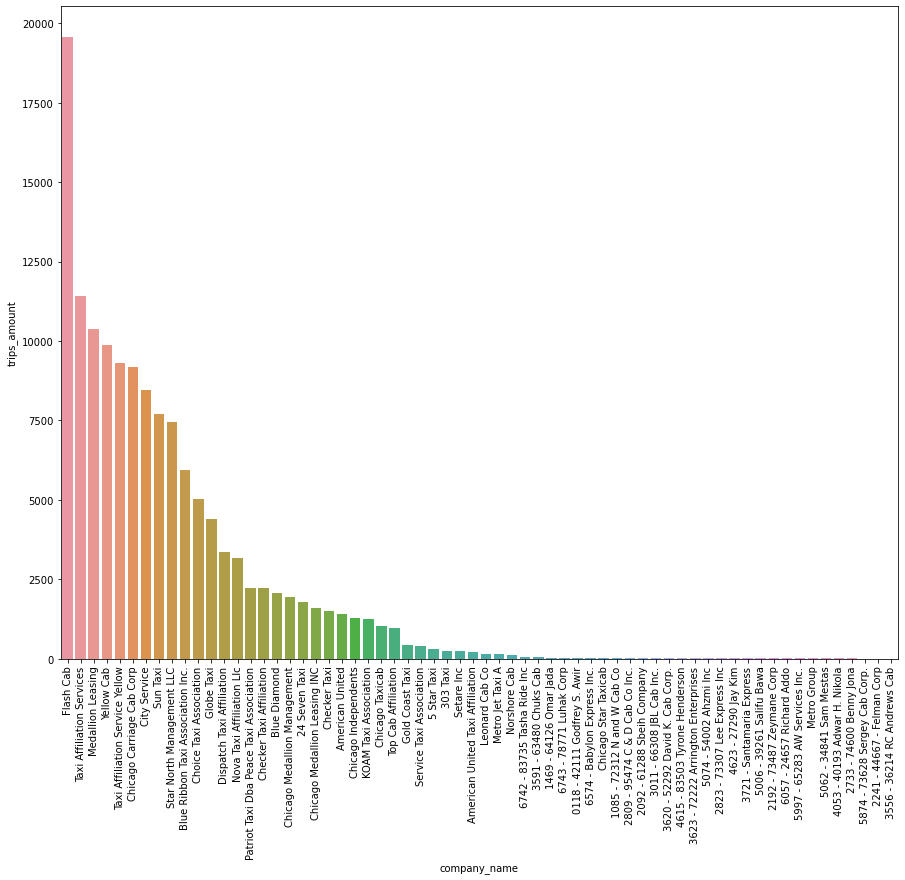

In [43]:
plt.subplots(figsize=(15,12))
sns.barplot(x=taxi_trip['company_name'], y=taxi_trip['trips_amount'])
plt.xticks(rotation=90)

***The above graph shows that 'Flash cab' company had close to 20,000 rides on Nov15-16 2017 whereas the company   
with more rides after it , is way less than half of its ride(11000).Out of total 64 companies in that area , more than half of them didnt have any rides during the given time period.Median Leasing,Yellow Cab,Tai Affiliatoin Service Yellow and Chicago carrier cab corp seem to perform in the same pace .Gold coast Taxi , Service taxi association , 5Star Taxi and few more has the fewest number of rides during the time frame though not wiped out totally..***

***Top 10 neighborhoods by number of dropoffs***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Loop'),
  Text(1, 0, 'River North'),
  Text(2, 0, 'Streeterville'),
  Text(3, 0, 'West Loop'),
  Text(4, 0, "O'Hare"),
  Text(5, 0, 'Lake View'),
  Text(6, 0, 'Grant Park'),
  Text(7, 0, 'Museum Campus'),
  Text(8, 0, 'Gold Coast'),
  Text(9, 0, 'Sheffield & DePaul')])

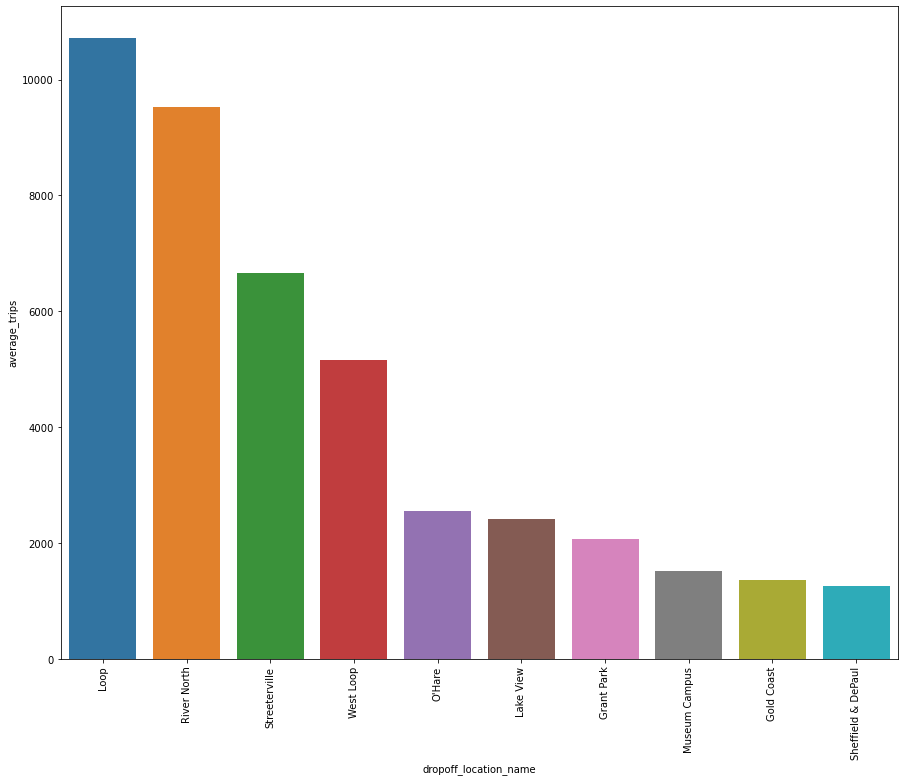

In [44]:
plt.subplots(figsize=(15,12))
sns.barplot(x=dropoff_trip_top10['dropoff_location_name'], y=dropoff_trip_top10['average_trips'])
plt.xticks(rotation=90)

***dropoff_trip graph shows that Loop is the frequently dropped off area with around 10600 rides in November.  
River North comes next with around 9600 rides..Streeterville and West Loop follows them in the list . O'Hare and  
all other locations following it (Lake View,Grant Park..) are in the lower range with way less than half the  
rides  of top ones ..(2000 rides)***


[Back to Contents](#back)

### Conclusions:  
***Based on our analysis , Flash Cab is the company which was running busy on the dates Nov15-16 with  
'Taxi Affiliation Services ' and 'Medallion Leasing' following it .  
'Loop' and 'River North' are the frequent dropoff spot with Streeterville and West Loop also showing significant  
dropoff during the month of November.These spots should have some pickup drives too though we are not sure how  
much do they contibute.  
Based on the above 2 analysis , 'Flash Cab' is the major competitor and 'Loop' and 'River North'being the  
location that has potential for more rides..***


<a id='hypothesis'></a>

# Testing hypotheses

In [45]:
#contains data on rides from the Loop to O'Hare International Airport.
Loop_Ohare_trip=pd.read_csv('loop_ohare_trip.csv')

In [46]:
Loop_Ohare_trip.head(10)

,Unnamed: 0,start_ts,weather_conditions,duration_seconds
0,0,2017-11-25 16:00:00,Good,2410.0
1,1,2017-11-25 14:00:00,Good,1920.0
2,2,2017-11-25 12:00:00,Good,1543.0
3,3,2017-11-04 10:00:00,Good,2512.0
4,4,2017-11-11 07:00:00,Good,1440.0
5,5,2017-11-11 04:00:00,Good,1320.0
6,6,2017-11-04 16:00:00,Bad,2969.0
7,7,2017-11-18 11:00:00,Good,2280.0
8,8,2017-11-11 14:00:00,Good,2460.0
9,9,2017-11-11 12:00:00,Good,2040.0


***Checking for inapproppriate values and missing values.***

In [47]:
Loop_Ohare_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1068 non-null   int64  
 1   start_ts            1068 non-null   object 
 2   weather_conditions  1068 non-null   object 
 3   duration_seconds    1068 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 33.5+ KB


In [48]:
Loop_Ohare_trip['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [49]:
Loop_Ohare_trip['duration_seconds'].unique()

array([2410., 1920., 1543., 2512., 1440., 1320., 2969., 2280., 2460.,
       2040., 1500., 1470., 1546., 2100.,   60., 2640., 1502., 1915.,
       2769., 2250., 1260., 2826., 3360., 3180., 1800., 2289., 1494.,
       1560., 1980., 2115., 1506., 2580., 1620., 1163., 1533., 1477.,
       1984., 2940., 1683., 1343., 1742., 1358., 2760., 1380., 1415.,
       1325., 1200., 2363., 1140., 2520., 3000., 3084., 2213., 3120.,
       4800., 1346., 2843., 1435., 2426., 1740., 2340., 2075., 1333.,
       2574., 2441., 3300., 1511., 2220., 2551., 2062., 2999., 1677.,
       1177., 1475., 3201., 1277., 1213., 4044., 1680., 2074., 2782.,
       2591., 3240., 1869., 1218., 2123., 1384., 3060., 3480., 2071.,
       3024., 1667., 2056., 1473., 3540., 2778., 1420., 2055., 2240.,
       2380., 2160., 1539., 1591., 2588., 1162.,    0., 1239., 2820.,
       3130., 2877., 2934., 3270., 1860., 2054., 2293., 2880., 2525.,
       1323., 1487., 1020., 1883., 2225., 2415., 3411., 2571.,  480.,
       1414., 1981.,

In [50]:
Loop_Ohare_trip['start_ts'].unique()

array(['2017-11-25 16:00:00', '2017-11-25 14:00:00',
       '2017-11-25 12:00:00', '2017-11-04 10:00:00',
       '2017-11-11 07:00:00', '2017-11-11 04:00:00',
       '2017-11-04 16:00:00', '2017-11-18 11:00:00',
       '2017-11-11 14:00:00', '2017-11-11 12:00:00',
       '2017-11-18 06:00:00', '2017-11-04 11:00:00',
       '2017-11-11 08:00:00', '2017-11-04 08:00:00',
       '2017-11-11 16:00:00', '2017-11-25 13:00:00',
       '2017-11-04 12:00:00', '2017-11-25 10:00:00',
       '2017-11-11 13:00:00', '2017-11-18 14:00:00',
       '2017-11-04 14:00:00', '2017-11-25 20:00:00',
       '2017-11-11 11:00:00', '2017-11-18 12:00:00',
       '2017-11-11 10:00:00', '2017-11-04 17:00:00',
       '2017-11-11 09:00:00', '2017-11-04 06:00:00',
       '2017-11-04 05:00:00', '2017-11-11 19:00:00',
       '2017-11-04 13:00:00', '2017-11-04 07:00:00',
       '2017-11-11 06:00:00', '2017-11-04 09:00:00',
       '2017-11-11 05:00:00', '2017-11-18 10:00:00',
       '2017-11-25 05:00:00', '2017-11-25 08:0

***We don't see any missing or inappropriate values in the 'Loop_Ohare_trip' dataset.***

#### Null Hypothesis:  
***The average duration of rides from the Loop to O'Hare International Airport is same on rainy Saturdays.***  
#### Alternate Hypothesis:    
***The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.***

In [51]:
#Loop_ohare_trip datas during bad weather(rain/storm)
Loop_Ohare_trip_bad=Loop_Ohare_trip[Loop_Ohare_trip['weather_conditions']=='Bad']

In [52]:
Loop_Ohare_trip_bad

,Unnamed: 0,start_ts,weather_conditions,duration_seconds
6,6,2017-11-04 16:00:00,Bad,2969.0
30,30,2017-11-18 12:00:00,Bad,1980.0
34,34,2017-11-04 17:00:00,Bad,2460.0
51,51,2017-11-04 16:00:00,Bad,2760.0
52,52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...,...
1031,1031,2017-11-18 12:00:00,Bad,2560.0
1032,1032,2017-11-18 10:00:00,Bad,1908.0
1053,1053,2017-11-18 12:00:00,Bad,2400.0
1061,1061,2017-11-18 16:00:00,Bad,2186.0


In [53]:
#Loop_ohare_trip datas during good weather
Loop_Ohare_trip_good=Loop_Ohare_trip[Loop_Ohare_trip['weather_conditions']=='Good']

In [54]:
Loop_Ohare_trip_good

,Unnamed: 0,start_ts,weather_conditions,duration_seconds
0,0,2017-11-25 16:00:00,Good,2410.0
1,1,2017-11-25 14:00:00,Good,1920.0
2,2,2017-11-25 12:00:00,Good,1543.0
3,3,2017-11-04 10:00:00,Good,2512.0
4,4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...,...
1062,1062,2017-11-11 06:00:00,Good,1500.0
1063,1063,2017-11-25 11:00:00,Good,0.0
1064,1064,2017-11-11 10:00:00,Good,1318.0
1065,1065,2017-11-11 13:00:00,Good,2100.0


***Perform Levene’s Test in Python to determine whether or not the two datasets have equal variances.***

In [55]:
alpha = 0.05  # critical statistical significance level

st.levene(Loop_Ohare_trip_good['duration_seconds'],Loop_Ohare_trip_bad['duration_seconds'], center='median')

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

***pvalue not being less than 0.05 means our null hypothesis(the two datasets have equal variances) would not be rejected.***

***In order to test our hypothesis that the means of the two statistical populations are equal based on samples taken from them, apply the method scipy.stats.ttest_ind(array1, array2, equal_var)***

In [56]:
results = st.ttest_ind(Loop_Ohare_trip_good['duration_seconds'],Loop_Ohare_trip_bad['duration_seconds'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  6.517970327099473e-12
We reject the null hypothesis


***p-value > alpha(0.05) means our null hypothesis is rejected i.e  
'The average duration of rides from the Loop to O'Hare International Airport is same on rainy Saturdays' is rejected which in turn accepts our alternate hypothesis 'The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.'***

<a id='end'></a>

# Final Conclusion:  
Based on our analysis ,  
***1.'Loop' and 'River North' are the potential locations to start our business from.  
2.Fresh Cab looks to be the strongest competitor .Since its based on just 2 days , we need more data to  
make a decision upon it.  
3.Based on our hypothesis testing ,rainy saturdays do impact the duration of the ride in Loop-O'hare  
neighborhood for dropoff.More datas like start/pic up neighborhood , datas on weekdays ,sundays.. will  
help to make a strong decision with respect to weather conditions affecting the duration .***

[Back to contents](#back)